In [630]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import log_loss,classification_report


In [551]:
import warnings
warnings.filterwarnings('ignore')

In [552]:
train = pd.read_csv("train.csv")
test = pd.read_csv('test.csv')

X = train.drop("Activity", axis=1)
Y = train.Activity

In [274]:
train.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


## EDA

In [279]:
X.isnull().sum().sum()

0

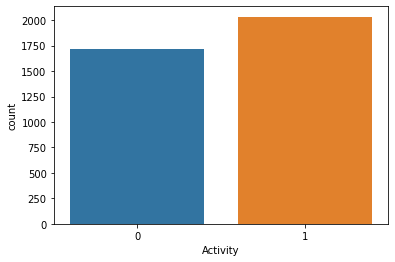

In [631]:
sns.countplot(Y)
plt.show()

In [297]:
from collections import Counter

In [308]:
s = Counter([len(X[col].unique()) for col in X.columns])
count_cols_unique = sorted(list(set([len(X[col].unique()) for col in X.columns])))
d ={your_key: s[your_key] for your_key in count_cols_unique[:10] }
d

{2: 835, 3: 59, 4: 87, 5: 113, 6: 84, 7: 76, 8: 59, 9: 44, 10: 44, 11: 45}

Il y a beaucoup de colonnes à valeurs binaires. Ceci pourrait être un problème de feature engineering

In [583]:
non_binaries = [col for col in X.columns if len(X[col].unique())>2]
binaries = [col for col in X.columns if not col in non_binaries]

In [310]:
print(f'Il y a {len(non_binaries)} colonnes non binaires')
print(f'Il y a {len(binaries)} colonnes binaires')

Il y a 941 colonnes non binaires
Il y a 835 colonnes binaires


In [311]:
train[non_binaries].describe()

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,D942,D943,D944,D945,D946,D947,D948,D949,D950,D951
count,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,...,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000
mean,0.076948,0.592436,0.068142,0.038990,0.212112,0.686653,0.274713,0.455133,0.749517,0.270411,...,0.005972,0.003566,0.002522,0.003599,0.001706,0.073312,0.003718,0.144028,0.092621,0.147179
std,0.079989,0.105860,0.078414,0.115885,0.102592,0.078702,0.090017,0.162731,0.071702,0.096128,...,0.052931,0.041530,0.028999,0.044159,0.026279,0.089265,0.035645,0.099207,0.077216,0.099669
min,0.000000,0.282128,0.000000,0.000000,0.002630,0.137873,0.006130,0.000000,0.275590,0.003040,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.033300,0.517811,0.000000,0.000000,0.138118,0.625627,0.207374,0.378062,0.707339,0.194357,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.025600,0.000000,0.125000,0.035700,0.088900
50%,0.066700,0.585989,0.050000,0.000000,0.190926,0.674037,0.277845,0.499942,0.738961,0.284316,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.051300,0.000000,0.125000,0.071400,0.133333
75%,0.100000,0.668395,0.100000,0.000000,0.261726,0.740663,0.335816,0.569962,0.788177,0.344626,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.102564,0.000000,0.125000,0.107143,0.177778
max,1.000000,0.964381,0.950000,1.000000,1.000000,0.994735,0.790831,0.989870,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.916667,0.875000,1.000000,0.955556


Search for correlation

In [ ]:
cor = train.corr()

In [556]:
def get_correlated_features(cor:pd.DataFrame,threshold:float):
    """
    Return correlated features over a given Threshold
    cor : pearson correlation dataframe
    threshold : correlation Threshold 
    """
    #get max correlated columns index
    Argmax = cor[cor!=1].replace(np.nan,0).apply(lambda x: np.argmax(np.abs(x)))
    #get the argmax correlation value 
    Cor = [cor.iloc[i:i+1,Argmax[i]:Argmax[i]+1].values[0][0] for i in range(len(Argmax))]
    #get the argmax colname
    Col = [cor.columns[Argmax[i]] for i in range(len(Argmax))]
    
    max_cor = pd.DataFrame({'Argmax':Argmax, 'Cor':Cor, 'Col':Col}).sort_values('Cor')
    max_cor.reset_index(inplace=True)
    too_correlated = max_cor[(max_cor.Cor>=threshold)|(max_cor.Cor<=-threshold)].drop_duplicates('Cor')
    
    return too_correlated

In [212]:
too_correlated = get_correlated_features(cor,0.9)

In [555]:
from sklearn.feature_selection import mutual_info_classif, SelectFromModel,SelectKBest,chi2

In [554]:
def get_Mutual_Info_With_Y(X,Y,threshold):
    """
    Return Mutual_Info_ of X's features With_Y over a given threshold
    X : features dataframe
    Y : target
    threshold : Mutual Info Threshold 
    """
    ft_selec = mutual_info_classif(X, Y , discrete_features='auto', n_neighbors=3 ,random_state=42)
    mi = pd.DataFrame({'Col':X.columns,'Mutual_Info_With_Y':ft_selec})
    mi = mi[mi.Mutual_Info_With_Y>=threshold].sort_values("Mutual_Info_With_Y",ascending=False)
    return mi

def get_chi2_best_features(X,Y,n):
    """
    Return n best features based on chi2 score
    X : features dataframe
    Y : target
    n : number of features 
    """
#     X_norm = MinMaxScaler().fit_transform(X)
    selector = SelectKBest(chi2, k=n).fit(X, Y)
    mask = selector.get_support()
    return X.columns[mask].tolist()

def get_best_features_tree_based_model(model,X,Y,n):
    """
    Return n best features based on model score
    model : model 
    X : features dataframe
    Y : target
    n : number of features 
    """
    embeded_selector = SelectFromModel(model, max_features=n)
    embeded_selector.fit(X, Y)
    mask = embeded_selector.get_support()
    return X.columns[mask].tolist()

In [584]:
mi_features = get_Mutual_Info_With_Y(X,Y,0.05)['Col'].tolist()
best_chi2_features = get_chi2_best_features(X,Y,200)

best_inter = list(set(mi_features)&set(best_chi2_features))
best_union = list(set(mi_features+best_chi2_features))

In [7]:
best_inter

['D64', 'D27', 'D61']

##### Recherche de outlier

<AxesSubplot:>

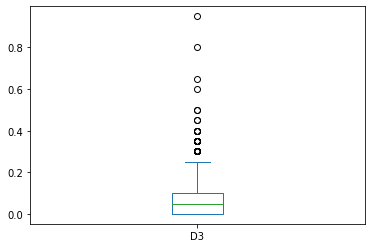

In [327]:
train.D3.plot.box()

In [328]:
train[train.D3>=0.6].shape

(4, 1777)

On note qu'il ya beaucoup de outliers et des ditribution en skew et cela pourrait potentillement baiser le split en train test et aussi les perfomances d'un modèle linéaire. <br>
Toutefois, compte tenu du très peu de nombre lignes que nous avons, il ne serait pas judicieux de les supprimer pour le moment.

## ACP

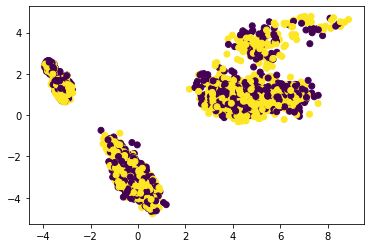

In [342]:
train_embedded = PCA(100, random_state=42).fit_transform(X)
plt.scatter(train_embedded[:,0],train_embedded[:,1],c=train.Activity.values)
plt.show()

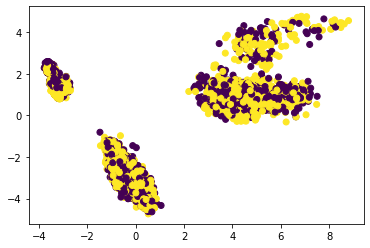

In [341]:
#acp sur les colonnes binaires uniquement
train_embedded = PCA(100,random_state=42).fit_transform(X[binaries])
plt.scatter(train_embedded[:,0],train_embedded[:,1],c=train.Activity.values)
plt.show()

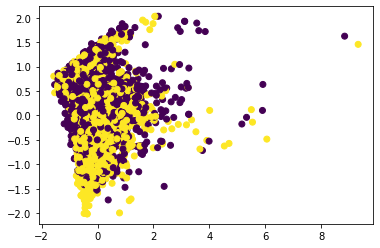

In [340]:
#acp sur les colonnes non binaires uniquement
train_embedded = PCA(100,random_state=42).fit_transform(X[non_binaries])
plt.scatter(train_embedded[:,0],train_embedded[:,1],c=train.Activity.values)
plt.show()

L'acp ne permet pas de faire la séparation des classes certainement dû à l'hypoyhèse de linéarité, d'autant plus que nous avons beaucoup de colonnes one-hot encodées. <br>
Lorsqu'on utilise uniquement les colonnes non-bianiares on remarque que le jeu de données n'est pas séparable, ou du mois, moins bien qu'avec la totalité des données. <br>
On peut conclure que les colonnes non binaires seules ne suffisent pas pour expliquer les classes.

In [370]:
def get_eigv_df(X_train:pd.DataFrame,dim:int):

    """
    plot the explained variance given the number of dimension of the PCA
    X_train : X DataFrame to reduce
    dim : number of dimension for the PCA
    """

    pca = PCA(dim).fit(X_train)

    eigv_df = pd.DataFrame({'dimension' : ['dim' + str(x+1) for x in range(dim)],
        'explained_var': pca.explained_variance_,
        '%_explained_var': np.round(pca.explained_variance_ratio_*100),
        '%_cumulative_explained_var': np.round(np.cumsum(pca.explained_variance_ratio_)*100)
        })
        
    fig, (ax1,ax2) = plt.subplots(1,2, figsize = (20,5))
    ax1.bar(eigv_df.dimension, eigv_df['%_explained_var'])
    ax1.set_title('Explained var'+str(dim))
    ax1.get_xaxis().set_visible(False)
    
    ax2.bar(eigv_df.dimension, eigv_df['%_cumulative_explained_var'])
    ax2.set_title('Cumu Explained var'+str(dim))
    m = max(eigv_df['%_cumulative_explained_var'])
    ax2.axhline(y = m, linewidth=0.5, color='red',linestyle='--')
    ax2.get_xaxis().set_visible(False)
    plt.text(dim,m+1,str(m)+'%')
    plt.show()



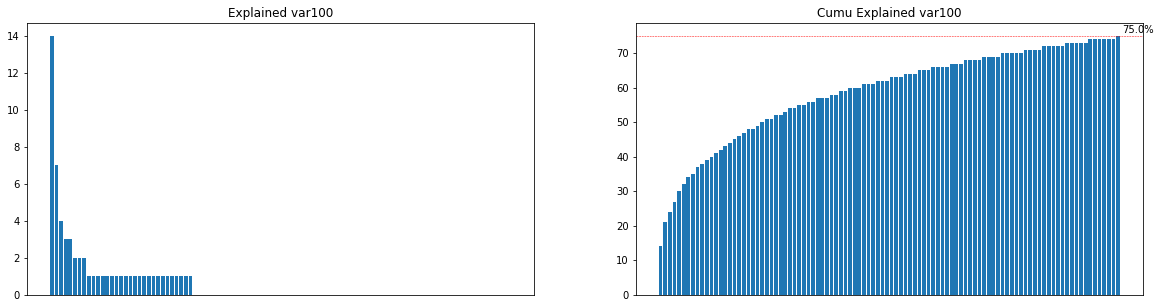

In [371]:
get_eigv_df(X,100)

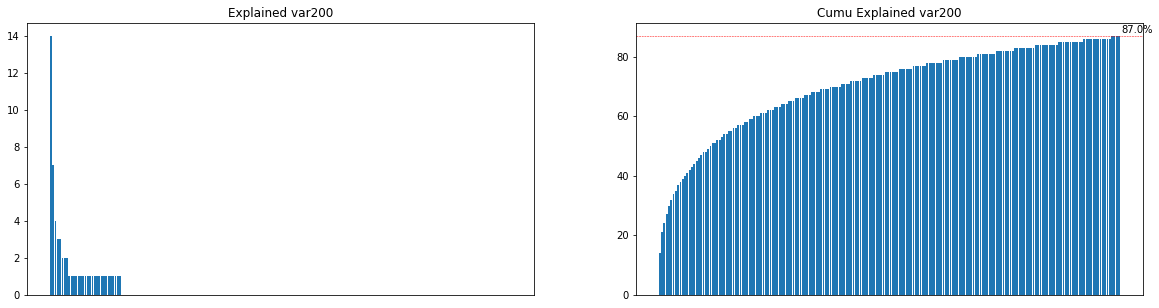

In [254]:
get_eigv_df(X,200)

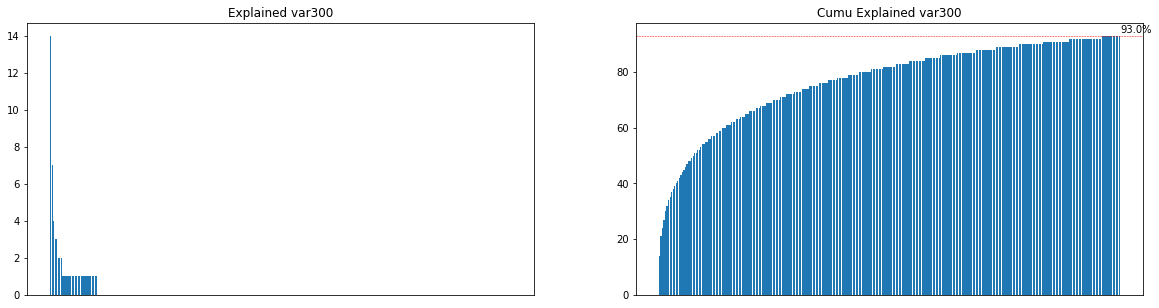

In [255]:
get_eigv_df(X,300)

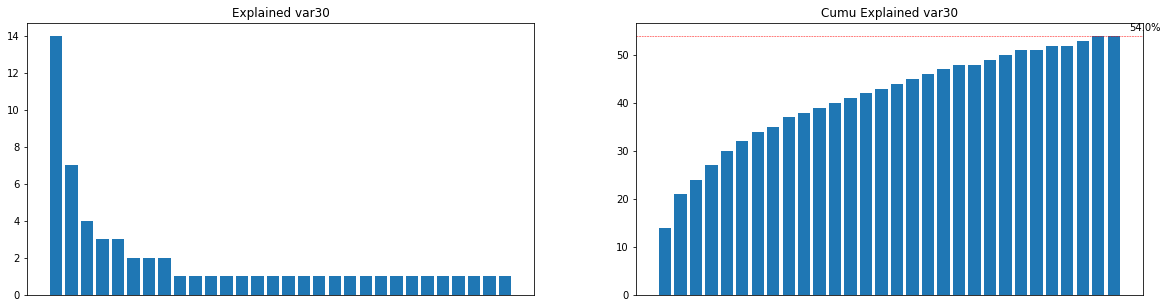

In [257]:
get_eigv_df(X,30)

On constate qu'une ACP avec 300 dimensions permet de récuppérer 93% de l'information du jeu de données mais avec 270 dimensions non significatives. Ces dimensions pourrait s'apparenter à du bruit. Par contre les 30 premières dimensions sont les plus significatives mais ne conservent que la moitié de l'information contenue dans le dataset. Idéalement, nous optons pour une rédutioon à 100 dimesnions en conservant 75% de l'information pour commencer (étant données qu'on à pas d'information précise la perte d'information acceptable sur le jeu de données)

## T-SNE

In [334]:

X_embedded = TSNE(n_components=2,perplexity=30, n_iter=400).fit_transform(X)
X_embedded.shape

(3751, 2)

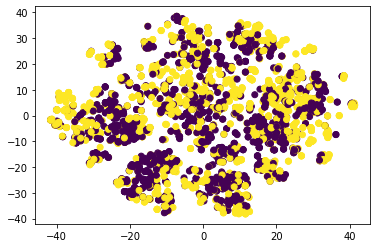

In [337]:
plt.scatter(X_embedded[:,0], X_embedded[:,1],c=Y.values)
plt.show()

On note également qu'une réduction TSNE ne permet pas de séparer convebalemnt le jeu de donnée.

## #Not a good idea to take PCA and t-sne data for prediction <br> We will have to utilize the entire dataset

## Modélisation

#### Usefull function

In [589]:

def train_pred(X_train, X_test, y_train, y_test , clf, acp:list):
    """
    train and test a classifier with or whithout PCA
    X_train : training values
    X_test : test values
    y_train : training labels
    y_test : test labels
    clf : classifier
    acp : PCA number of dimension
    
    """

    clf.fit(X_train, y_train)
    probas_train = clf.predict_proba(X_train)[:,1]
    print('Train loss:',log_loss(y_train,probas_train))
    probas = clf.predict_proba(X_test)[:,1]
    print('Test loss:',log_loss(y_test,probas))
    # print(classification_report(y_test, clf.predict(X_test)))
    
    for dim in acp:
        
        if dim>0 and dim<X_train.shape[1]:
            print('\n')
            print(f'---ACP {dim} dimensions---'*4)
            pca = PCA(dim, random_state=42).fit(X_train)
            temp_X_train, temp_X_test = pca.transform(X_train), pca.transform(X_test)
            clf.fit(temp_X_train, y_train)
            probas_train = clf.predict_proba(temp_X_train)[:,1]
            print('ACP Train loss:',log_loss(y_train,probas_train))
            probas = clf.predict_proba(temp_X_test)[:,1]
            print('Test loss:',log_loss(y_test,probas))
            # print(classification_report(y_test, clf.predict(X_test)))
        

def train_test_grid(X_train, X_test, y_train, y_test ,clf, parameters:dict):
    """
    train and test on grid with crossvalidation
    X_train : training values
    X_test : test values
    y_train : training labels
    y_test : test labels
    clf : classifier
    parameters : grid dict
    """
    grid = GridSearchCV(clf, parameters, cv=5)
    grid.fit(X_train, y_train)

    print('Best estimator :',grid.best_estimator_)

    probas_train = grid.best_estimator_.predict_proba(X_train)[:,1]
    print('Train loss:',log_loss(y_train,probas_train))
    probas = grid.best_estimator_.predict_proba(X_test)[:,1]
    print('Test loss:',log_loss(y_test,probas))

    return grid


def make_submission(model, test, sub_name:str):
    """
    write the submission df
    model : the final model
    test : the test df for the final prediction
    subname : name of the submission file
    """
    probas = model.predict_proba(test)[:,1]
    submission = pd.DataFrame({'MoleculeId':[x for x in range(1,len(test)+1)],'PredictedProbability':probas})
    submission.to_csv(f'submission_{sub_name}.csv',index=False)

In [557]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.1, random_state=42)

#### Logistic reg baseline

##### #Logreg all dataset

In [270]:
clf = LogisticRegression(random_state=42)
train_pred(X_train, X_test, y_train, y_test, clf, acp=[100,200,300])

Train loss: 0.30489629224546716
Test loss: 0.6384649417110939


---ACP 100 dimensions------ACP 100 dimensions------ACP 100 dimensions------ACP 100 dimensions---
ACP Train loss: 0.482628469212798
Test loss: 0.5382059412434232


---ACP 200 dimensions------ACP 200 dimensions------ACP 200 dimensions------ACP 200 dimensions---
ACP Train loss: 0.45292641490902125
Test loss: 0.532459966107452


---ACP 300 dimensions------ACP 300 dimensions------ACP 300 dimensions------ACP 300 dimensions---
ACP Train loss: 0.42860167545522165
Test loss: 0.5502782707464713


Il semble que l'acp réduit l'overfitting mais n'améliore pas les perf du model.

##### #On selected feats

In [275]:
temp_X_train, temp_X_test, temp_y_train, temp_y_test = train_test_split(X[best_union],Y, test_size=0.1, random_state=42)
train_pred(temp_X_train, temp_X_test, temp_y_train, temp_y_test, clf, acp=[100,200,300])

Train loss: 0.45784062415334725
Test loss: 0.5442763155671265


---ACP 100 dimensions------ACP 100 dimensions------ACP 100 dimensions------ACP 100 dimensions---
ACP Train loss: 0.4896658486018023
Test loss: 0.5316078245582966


---ACP 200 dimensions------ACP 200 dimensions------ACP 200 dimensions------ACP 200 dimensions---
ACP Train loss: 0.4593283987676459
Test loss: 0.5452301437336106


##### #Logreg binaires only

In [276]:
#Model base line avec données binaires uniquement
temp_X_train, temp_X_test, temp_y_train, temp_y_test = train_test_split(X[binaries],Y, test_size=0.1, random_state=42)
train_pred(temp_X_train, temp_X_test, temp_y_train, temp_y_test, clf, acp=[100,200,300])

Train loss: 0.36936010253926377
Test loss: 0.6800582403224674


---ACP 100 dimensions------ACP 100 dimensions------ACP 100 dimensions------ACP 100 dimensions---
ACP Train loss: 0.4918498973809609
Test loss: 0.5558233490304285


---ACP 200 dimensions------ACP 200 dimensions------ACP 200 dimensions------ACP 200 dimensions---
ACP Train loss: 0.46324086101165357
Test loss: 0.5551562393772012


---ACP 300 dimensions------ACP 300 dimensions------ACP 300 dimensions------ACP 300 dimensions---
ACP Train loss: 0.43575493469862664
Test loss: 0.5771292546337182


##### #Logreg non binaries

In [277]:
#Model base line avec données non binaires uniquement
temp_X_train, temp_X_test, temp_y_train, temp_y_test  = train_test_split(X[non_binaries],Y, test_size=0.1, random_state=42)
train_pred(temp_X_train, temp_X_test, temp_y_train, temp_y_test, clf, acp=[100,200])

Train loss: 0.42823758303303205
Test loss: 0.4810678324450219


---ACP 100 dimensions------ACP 100 dimensions------ACP 100 dimensions------ACP 100 dimensions---
ACP Train loss: 0.5007567979999689
Test loss: 0.5053542611136213


---ACP 200 dimensions------ACP 200 dimensions------ACP 200 dimensions------ACP 200 dimensions---
ACP Train loss: 0.4589560211775125
Test loss: 0.49520687691022863


Lorqu'on utilise les variables binnaires uniquement on constate à peu près les mêmes perf que le modèle avec toutes les variables, il y a aussi de l'overfiting et le même constat sur l'ACP. Par contre, le modèle baseline entrainé avec les données non binaires n'overfit pas, mais n'apprends pas assez.

##### #Rugalization on Logreg

In [424]:
clf = LogisticRegression(solver ='saga', random_state=42)

parameters = {  
    'penalty' : ['l1', 'l2','elasticnet'],
    'C' : [ 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3]}

grid = train_test_grid(X_train, X_test, y_train, y_test ,clf, parameters)


Best estimator : LogisticRegression(C=0.1, random_state=42, solver='saga')
Train loss: 0.38251932570836894
Test loss: 0.5198518640284147


In [427]:
make_submission(grid, test, 'logreg_reg')

<span style="color:blue">Score public **0.53**</span> 

#### Random Forest

##### #Scratch

In [278]:
rf_clf = RandomForestClassifier(n_estimators=200,criterion='gini',max_depth=6, random_state=42)

In [ ]:
train_pred(temp_X_train, temp_X_test, temp_y_train, temp_y_test, clf, acp=[100,200,300])

Feature selection 

In [249]:
model = rf_clf.fit(X_train,y_train)
forest_importances = pd.DataFrame({'Importance':model.feature_importances_, 'Col':X.columns})
best_rf = forest_importances[forest_importances.Importance>0.001].sort_values('Importance', ascending=False)

In [279]:
train_pred(X_train[best_rf.Col.values], X_test[best_rf.Col.values], y_train, y_test, rf_clf, acp=[100,300])

Train loss: 0.44801541326567573
Test loss: 0.507089403332126


---ACP 100 dimensions------ACP 100 dimensions------ACP 100 dimensions------ACP 100 dimensions---
ACP Train loss: 0.49172805384868273
Test loss: 0.5593438311824884


On ne note pas forcément d'overfiting mais le modèle n'est pas très bon. <br>
L'ACP n'améliore pas les perf avec le random forest

##### #non binarie feature

In [280]:
temp_X_train, temp_X_test, temp_y_train, temp_y_test  = train_test_split(X[non_binaries],Y, test_size=0.1, random_state=42)
train_pred(temp_X_train, temp_X_test, temp_y_train, temp_y_test, rf_clf, acp=[100,300])

Train loss: 0.489789436662227
Test loss: 0.5392060149587257


---ACP 100 dimensions------ACP 100 dimensions------ACP 100 dimensions------ACP 100 dimensions---
ACP Train loss: 0.5074652831073948
Test loss: 0.577558859724811


---ACP 300 dimensions------ACP 300 dimensions------ACP 300 dimensions------ACP 300 dimensions---
ACP Train loss: 0.5247228049657247
Test loss: 0.6019206689922934


##### #binarie feature

In [281]:
temp_X_train, temp_X_test, temp_y_train, temp_y_test  = train_test_split(X[binaries],Y, test_size=0.1, random_state=42)
train_pred(temp_X_train, temp_X_test, temp_y_train, temp_y_test, rf_clf, acp=[100,300])

Train loss: 0.533755670268452
Test loss: 0.5764819739973505


---ACP 100 dimensions------ACP 100 dimensions------ACP 100 dimensions------ACP 100 dimensions---
ACP Train loss: 0.4895311371278178
Test loss: 0.572911046876494


---ACP 300 dimensions------ACP 300 dimensions------ACP 300 dimensions------ACP 300 dimensions---
ACP Train loss: 0.5037663241032921
Test loss: 0.591312931060291


##### #Random forest Grid

In [283]:
rf_class = RandomForestClassifier(criterion='gini', random_state=42)

parameters = {  'n_estimators' : [50,150,200],
                'max_depth' : [2,3,4,6]}

grid = train_test_grid(X_train, X_test, y_train, y_test ,rf_class, parameters)


Best estimator : RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
Train loss: 0.4814210056134587
Test loss: 0.530691334678573


In [284]:
make_submission(grid, test, 'rf_reg')

<span style="color:blue">Score public **0.53**</span>

#### XGBoost

In [13]:
xgb_clf = XGBClassifier(n_estimators = 150, max_depth = 4, learning_rate=.1)
train_pred(X_train, X_test, y_train, y_test, xgb_clf, acp=[100,200])

[21:29:08] WARNING: /mnt/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train loss: 0.23984907563941346
Test loss: 0.4328279902321346


---ACP 100 dimensions------ACP 100 dimensions------ACP 100 dimensions------ACP 100 dimensions---
[21:29:19] WARNING: /mnt/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
ACP Train loss: 0.22313974635848016
Test loss: 0.5021270339852794


---ACP 200 dimensions------ACP 200 dimensions------ACP 200 dimensions------ACP 200 dimensions---
[21:29:23] WARNING: /mnt/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logisti

Feature selection 

In [14]:
model = xgb_clf.fit(X_train,y_train)
forest_importances = pd.DataFrame({'Importance':model.feature_importances_, 'Col':X.columns})
forest_importances.sort_values('Importance', ascending=False).head(20)

[21:29:40] WARNING: /mnt/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Importance,Col
26,0.061145,D27
77,0.019994,D78
84,0.008882,D85
747,0.007675,D748
1099,0.007105,D1100
132,0.007011,D133
1035,0.006383,D1036
118,0.006243,D119
1075,0.006242,D1076
34,0.006165,D35


In [15]:
best_xgb = forest_importances[forest_importances.Importance>0.001].sort_values('Importance', ascending=False)
train_pred(X_train[best_xgb.Col.values], X_test[best_xgb.Col.values], y_train, y_test, xgb_clf, acp=[100,300])

[21:29:55] WARNING: /mnt/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train loss: 0.23808566923467098
Test loss: 0.44206668035761315


---ACP 100 dimensions------ACP 100 dimensions------ACP 100 dimensions------ACP 100 dimensions---
[21:29:58] WARNING: /mnt/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
ACP Train loss: 0.23601671259215584
Test loss: 0.5035257447471327


---ACP 300 dimensions------ACP 300 dimensions------ACP 300 dimensions------ACP 300 dimensions---
[21:30:02] WARNING: /mnt/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logist

 **essayer de regulariser le xgb a 500 ou 300 dimensions sur mes features impoetances**

avec l'ACP On a de meilleur résultat sur le train. Mais on est en sur apprentissage. Il faut essyaer un feature selction

##### #XGB Grid

In [ ]:
xgb = XGBClassifier(n_estimators=200, max_depth=4, learning_rate= 0.1,eval_metric = log_loss)

parameters = {  'learning_rate':  [0.001,0.005,0.01,0.05,0.1 ],
                'reg_alpha' : [2,3,4,6],
                'reg_lambda' : [2,3,4,6],
                'gamma': [0.001,0.01,0.1]}

grid_xgb = train_test_grid(X[temp_best], X_test[temp_best], Y, y_test ,xgb, parameters)

In [608]:
train_pred(X, X_test, Y, y_test, grid_xgb.best_estimator_, acp=[0])

[16:40:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train loss: 0.21199447318990508
Test loss: 0.20785437301395737


In [612]:
forest_importances = pd.DataFrame({'Importance':grid_xgb.best_estimator_.feature_importances_, 'Col':X.columns})
best_grid_xgb = forest_importances[forest_importances.Importance>0.00001].sort_values('Importance', ascending=False)
train_pred(X_train[best_grid_xgb.Col.values], X_test[best_grid_xgb.Col.values], y_train, y_test, grid_xgb.best_estimator_, acp=[0])

[16:41:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train loss: 0.2045749882541045
Test loss: 0.42815971494890115


In [614]:
temp_best = best_grid_xgb.Col.values

In [613]:
make_submission(grid_xgb.best_estimator_, test[best_grid_xgb.Col.values], 'grid_xgb_nst_200_on_xgb_best_feat')

In [617]:
best_for_now = grid_xgb.best_params_

{'gamma': 0.001, 'learning_rate': 0.1, 'reg_alpha': 2, 'reg_lambda': 3}

In [ ]:
xgb_clf = XGBClassifier() #eval_metric=log_loss,predictor='gpu_predictor'

parameters = {  'n_estimators' : [10,25,50,200],
                'max_depth' : [3,4,5,6] ,
                'learning_rate':  [0.001,0.005,0.01,0.05,0.1 ],
                'reg_alpha' : [2,3,4],
                'reg_lambda' : [2,3,4],
                'loss':[log_loss],
                'gamma': [0.001,0.01,0.1]}

grid = train_test_grid(X_train, X_test, y_train, y_test ,xgb_clf, parameters)

In [560]:
grid.best_params_

{'gamma': 0.01,
 'learning_rate': 0.05,
 'loss': <function sklearn.metrics._classification.log_loss(y_true, y_pred, *, eps=1e-15, normalize=True, sample_weight=None, labels=None)>,
 'max_depth': 6,
 'n_estimators': 200,
 'reg_alpha': 3}

In [ ]:
prive_0_41 = {'learning_rate': 0.1,
 'max_depth': 6,
 'n_estimators': 50,
 'reg_alpha': 2,
 'reg_lambda': 2}

In [235]:
best_for_old = {'learning_rate': 0.1,
 'loss':log_loss,
 'max_depth': 6,
 'n_estimators': 200,
 'reg_alpha': 2,
 'reg_lambda': 4}

Feature Importance

In [568]:
forest_importances = pd.DataFrame({'Importance':grid.best_estimator_.feature_importances_, 'Col':X.columns})
forest_importances.sort_values('Importance', ascending=False).head(20)

,Importance,Col
26,0.064844,D27
77,0.017109,D78
84,0.015001,D85
224,0.011170,D225
1035,0.007128,D1036
899,0.006879,D900
774,0.006466,D775
602,0.004953,D603
522,0.004920,D523
665,0.004785,D666


In [569]:
best_xgb_grid = forest_importances[forest_importances.Importance>0.001].sort_values('Importance', ascending=False)
train_pred(X_train[best_xgb_grid.Col.values], X_test[best_xgb_grid.Col.values], y_train, y_test, grid.best_estimator_, acp=[100,300,500])

[21:10:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train loss: 0.17046465684501108
Test loss: 0.4408352239419052


---ACP 100 dimensions------ACP 100 dimensions------ACP 100 dimensions------ACP 100 dimensions---
[21:10:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
ACP Train loss: 0.15330749172275818
Test loss: 0.48801921243640656


---ACP 300 dimensions------ACP 300 dimensions------ACP 300 dimensions------ACP 300 dimensions---
[21:10:15] WARNING: C:/Users/Administrator/workspace/

#### LGBM

In [639]:
bon_lgb = LGBMClassifier(random_state=314, silent=True,subsample_freq = 20, subsample = 0.9, 
                       reg_lambda = 1.2, reg_alpha = 1.1,num_leaves= 200, n_estimators = 700, 
                       min_split_gain =  0.4, max_depth =  15, colsample_bytree = 0.8)

In [636]:
# lgb = LGBMClassifier(random_state=314, silent=True,subsample_freq = 20, subsample = 0.9, learning_rate=0.01,
#                        reg_lambda = 1.2, reg_alpha = 3, num_leaves= 200, n_estimators = 700, 
#                        min_split_gain =  0.1, max_depth =  15, colsample_bytree = 0.8,importance_type ='gain')

# train_pred(X_train, X_test, y_train, y_test, lgb, acp=[0])
train_pred(X, X_test, Y, y_test, lgb, acp=[0])                

In [643]:
model = lgb.fit(X_train,y_train)
forest_importances = pd.DataFrame({'Importance':model.feature_importances_, 'Col':X.columns})
forest_importances.sort_values('Importance', ascending=False).head(10)


,Importance,Col
25,106,D26
13,102,D14
105,97,D106
17,92,D18
9,88,D10
103,85,D104
37,80,D38
7,79,D8
4,75,D5
45,75,D46


In [654]:
best_lgb = forest_importances[forest_importances.Importance>0.001].sort_values('Importance', ascending=False)
train_pred(X[best_lgb.Col.values], X_test[best_lgb.Col.values], Y, y_test, lgb, acp=[0])

Train loss: 0.1372626982703502
Test loss: 0.13396846458543324


In [661]:
scaler = MinMaxScaler().fit(X_train[best_lgb.Col.values])
train_x = scaler.transform(X_train[best_lgb.Col.values])
test_x= scaler.transform(X_test[best_lgb.Col.values])
train_pred(train_x, test_x, y_train, y_test, lgb, acp=[0])

Train loss: 0.13837466962078407
Test loss: 0.4362277368328402


In [663]:
bon_lgb = LGBMClassifier(random_state=314, silent=True,subsample_freq = 20, subsample = 0.9, 
                        num_leaves= 200, n_estimators = 700, importance_type ='gain',
                       min_split_gain =  0.4, max_depth =  15, colsample_bytree = 0.8)

parameters = {  'learning_rate':  [0.001,0.005,0.01,0.05,0.1],
                'reg_alpha' : [2,3,4,6],
                'reg_lambda' : [2,3,4,6]}

grid_lgb = train_test_grid(X, X_test, Y, y_test ,bon_lgb, parameters)

Best estimator : LGBMClassifier(colsample_bytree=0.8, importance_type='gain', learning_rate=0.01,
               max_depth=15, min_split_gain=0.4, n_estimators=700,
               num_leaves=200, random_state=314, reg_alpha=2, reg_lambda=3,
               silent=True, subsample=0.9, subsample_freq=20)
Train loss: 0.2103870160128729
Test loss: 0.202154176364208


In [667]:
make_submission(grid_lgb.best_estimator_, test, 'lgb_grid_all')

## Pycaret classif

In [ ]:
from pycaret.classification import *
experiment = setup(data = train,  target = 'Activity')

In [ ]:
add_metric('logloss', 'Log Loss', log_loss, greater_is_better = False)

Name                                                       Log Loss
Display Name                                               Log Loss
Score Function            <function log_loss at 0x00000171DF65B4C0>
Scorer               make_scorer(log_loss, greater_is_better=False)
Target                                                         pred
Args                                                             {}
Greater is Better                                             False
Multiclass                                                     True
Custom                                                         True
Name: logloss, dtype: object

In [10]:
best_model = compare_models(sort = 'logloss')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Log Loss,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7954,0.8635,0.8280,0.8054,0.8159,0.5858,0.5874,7.0656,0.9940
catboost,CatBoost Classifier,0.7935,0.8637,0.8301,0.8013,0.8148,0.5817,0.5834,7.1313,29.8570
xgboost,Extreme Gradient Boosting,0.7916,0.8635,0.8232,0.8034,0.8120,0.5783,0.5807,7.1975,4.6430
rf,Random Forest Classifier,0.7905,0.8663,0.8079,0.8110,0.8083,0.5772,0.5792,7.2375,0.5160
et,Extra Trees Classifier,0.7848,0.8592,0.8065,0.8024,0.8036,0.5655,0.5670,7.4337,0.5680
gbc,Gradient Boosting Classifier,0.7806,0.8483,0.8196,0.7885,0.8035,0.5553,0.5563,7.5793,3.8080
ada,Ada Boost Classifier,0.7615,0.8130,0.7939,0.7770,0.7845,0.5175,0.5191,8.2368,0.8760
ridge,Ridge Classifier,0.7463,0.0000,0.7813,0.7614,0.7709,0.4866,0.4873,8.7640,0.1590
knn,K Neighbors Classifier,0.7371,0.7953,0.7869,0.7469,0.7662,0.4665,0.4675,9.0793,2.4870
dt,Decision Tree Classifier,0.7211,0.7182,0.7501,0.7445,0.7463,0.4367,0.4382,9.6313,0.2790


In [12]:
best_model.feature_importances_

array([ 2, 32,  1, ...,  0,  0,  0])

In [13]:
lgb = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Log Loss
0,0.7947,0.8902,0.8681,0.7812,0.8224,0.5807,0.5852,7.0917
1,0.8023,0.8717,0.8125,0.8239,0.8182,0.6015,0.6016,6.8290
2,0.7643,0.8271,0.7986,0.7770,0.7877,0.5228,0.5231,8.1423
3,0.7909,0.8761,0.8056,0.8112,0.8084,0.5782,0.5783,7.2230
4,0.8137,0.8936,0.7847,0.8626,0.8218,0.6275,0.6306,6.4350
5,0.7977,0.8520,0.8462,0.7961,0.8203,0.5894,0.5908,6.9869
6,0.7939,0.8627,0.8462,0.7908,0.8176,0.5813,0.5831,7.1188
7,0.7977,0.8527,0.8252,0.8082,0.8166,0.5911,0.5913,6.9869
8,0.7710,0.8542,0.8462,0.7610,0.8013,0.5328,0.5370,7.9098
9,0.8282,0.8549,0.8472,0.8414,0.8443,0.6528,0.6528,5.9323


In [14]:
tuned_ = tune_model(lgb)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Log Loss
0,0.8023,0.9007,0.8611,0.7949,0.8267,0.5974,0.6000,6.8291
1,0.7719,0.8685,0.7639,0.8088,0.7857,0.5422,0.5433,7.8796
2,0.7643,0.8426,0.7917,0.7808,0.7862,0.5235,0.5236,8.1423
3,0.7985,0.8850,0.7986,0.8273,0.8127,0.5948,0.5952,6.9604
4,0.8175,0.8948,0.7708,0.8810,0.8222,0.6364,0.6424,6.3037
5,0.8206,0.8748,0.8881,0.8038,0.8439,0.6343,0.6387,6.1960
6,0.8053,0.8634,0.8531,0.8026,0.8271,0.6049,0.6064,6.7233
7,0.7748,0.8535,0.8042,0.7877,0.7958,0.5448,0.5450,7.7779
8,0.7672,0.8597,0.8531,0.7531,0.8000,0.5240,0.5299,8.0416
9,0.8053,0.8556,0.8194,0.8252,0.8223,0.6071,0.6071,6.7233


In [16]:
evaluate_model(lgb)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…